In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [18]:
df['spam'] = df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [19]:
X = df['Message']
y = df['spam']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

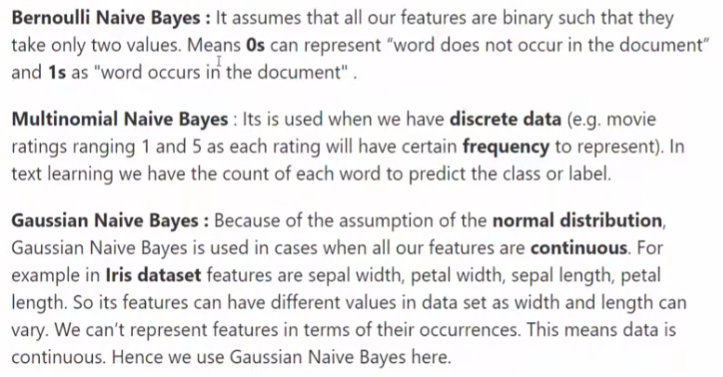

In [22]:
from sklearn.naive_bayes import MultinomialNB
model_nb = MultinomialNB()
model_nb.fit(X_train_cv, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [23]:
y_pred_nb = model_nb.predict(X_test_cv)
y_pred_nb

array([0, 0, 0, ..., 0, 1, 0], shape=(1672,))

Accuracy: 0.9904306220095693
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1448
           1       0.98      0.95      0.96       224

    accuracy                           0.99      1672
   macro avg       0.99      0.97      0.98      1672
weighted avg       0.99      0.99      0.99      1672



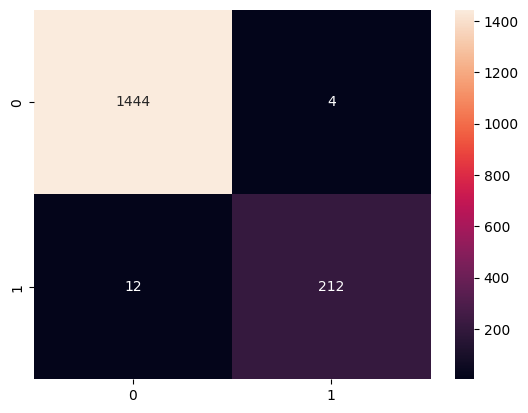

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt = 'd')
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


here precision is imp 

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_nb, X_train_cv, y_train, cv = 5)
print(scores)
print(scores.mean())

# the model is consistent and is not overfitting or underfitting.

[0.97948718 0.97820513 0.97179487 0.98076923 0.98333333]
0.9787179487179486


In [36]:
user_msg = input("Enter a message: ")
user_msg_cv = cv.transform([user_msg])
user_pred = model_nb.predict(user_msg_cv)
if user_pred[0] == 1:
    print("The message is SPAM !!") 
else:
    print("The message is NOT SPAM")

The message is SPAM !!
